Automatically created module for IPython interactive environment


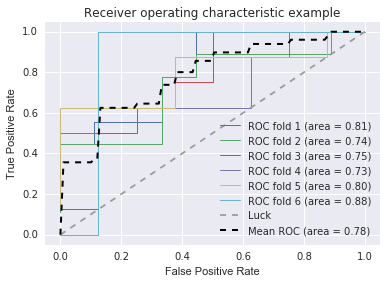

In [34]:
print(__doc__)  
  
import numpy as np  
from scipy import interp  
import matplotlib.pyplot as plt  
  
from sklearn import svm, datasets  
from sklearn.metrics import roc_curve, auc  
from sklearn.model_selection import StratifiedKFold  
  
###############################################################################  
# Data IO and generation,导入iris数据，做数据准备  
  
# import some data to play with  
iris = datasets.load_iris()  
X = iris.data  
y = iris.target  
X, y = X[y != 2], y[y != 2]#去掉了label为2，label只能二分，才可以。  
n_samples, n_features = X.shape  
  
# Add noisy features  
random_state = np.random.RandomState(0)  
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]  
  
###############################################################################  
# Classification and ROC analysis  
#分类，做ROC分析  
  
# Run classifier with cross-validation and plot ROC curves  
#使用6折交叉验证，并且画ROC曲线  
cv = StratifiedKFold(n_splits=6)  
classifier = svm.SVC(kernel='linear', probability=True,  
                     random_state=random_state)#注意这里，probability=True,需要，不然预测的时候会出现异常。另外rbf核效果更好些。  
  
mean_tpr = 0.0  
mean_fpr = np.linspace(0, 1, 100)  
all_tpr = []  
  
i = 1
for train, test in cv.split(X, y):
    #通过训练数据，使用svm线性核建立模型，并对测试集进行测试，求出预测得分  
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])  
#    print set(y[train])                     #set([0,1]) 即label有两个类别  
#    print len(X[train]),len(X[test])        #训练集有84个，测试集有16个  
#    print "++",probas_                      #predict_proba()函数输出的是测试集在lael各类别上的置信度，  
#    #在哪个类别上的置信度高，则分为哪类  
    # Compute ROC curve and area the curve  
    #通过roc_curve()函数，求出fpr和tpr，以及阈值  
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])  
    mean_tpr += interp(mean_fpr, fpr, tpr)          #对mean_tpr在mean_fpr处进行插值，通过scipy包调用interp()函数  
    mean_tpr[0] = 0.0                               #初始处为0  
    roc_auc = auc(fpr, tpr)  
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数能计算出来  
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i = i + 1
  
#画对角线  
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')  
  
mean_tpr /= 6                     #在mean_fpr100个点，每个点处插值插值多次取平均  
mean_tpr[-1] = 1.0                      #坐标最后一个点为（1,1）  
mean_auc = auc(mean_fpr, mean_tpr)      #计算平均AUC值  
#画平均ROC曲线  
#print mean_fpr,len(mean_fpr)  
#print mean_tpr  
plt.plot(mean_fpr, mean_tpr, 'k--',  
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)  
  
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver operating characteristic example')  
plt.legend(loc="lower right")  
plt.show()  

以下的ROC曲线和准确率是1，是因为模型是直接用训练集的特征来预测的，根本就跟真实的标签一模一样

In [31]:
def plotRUC(yt, ys, title=None):
    '''
    绘制ROC-AUC曲线
    :param yt: y真值
    :param ys: y预测值
    '''
    from sklearn import metrics
    from matplotlib import pyplot as plt
    f_pos, t_pos, thresh = metrics.roc_curve(yt, ys)
    auc_area = metrics.auc(f_pos, t_pos)
    print('auc_area: {}'.format(auc_area))

    plt.plot(f_pos, t_pos, 'darkorange', lw=2, label='AUC = %.2f' % auc_area)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.title('ROC-AUC curve for %s' % title)
    plt.ylabel('True Pos Rate')
    plt.xlabel('False Pos Rate')
    plt.show()

auc_area: 1.0


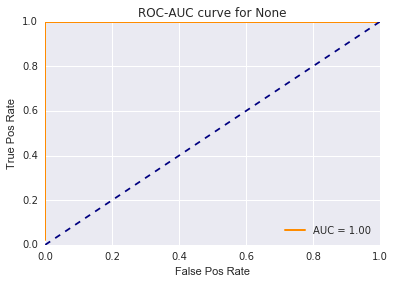

In [32]:
clf = classifier.fit(X, y)
plotRUC(y, clf.predict_proba(X)[:, 1])

In [41]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
accuracy.mean()

0.70000000000000007